In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import dual_annealing
from scipy.optimize import differential_evolution
from scipy.optimize import basinhopping

При фиксированном seed=42 поразбирайтесь и поэкспериментируйте с параметрами алгоритма дифференциальной эволюции: strategy, popsize, tol, mutation, recombination и updating.

Постройте графики количества итераций оптимизации функции ackley от значения параметра.

In [34]:

def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

bounds = [(-10, 10), (-10, 10)]
result = differential_evolution(ackley, bounds, seed=42)
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2793
     nit: 90
 success: True
       x: array([0., 0.])

In [35]:
# Попробуем разные стратегии:
result = differential_evolution(ackley, bounds, strategy='rand1exp', seed=42)
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 7473
     nit: 246
 success: True
       x: array([0., 0.])

In [36]:
# Попробуем разные стратегии:
result = differential_evolution(ackley, bounds, strategy='currenttobest1bin', seed=42)
result

     fun: 4.440892098500626e-16
 message: 'Maximum number of iterations has been exceeded.'
    nfev: 30093
     nit: 1000
 success: False
       x: array([0., 0.])

In [37]:
# Попробуем разные стратегии:
result = differential_evolution(ackley, bounds, strategy='best2bin', seed=42)
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 5073
     nit: 166
 success: True
       x: array([0., 0.])

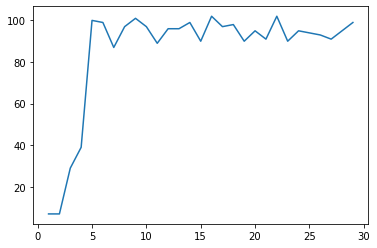

Wall time: 5.25 s


In [25]:
%%time
# Поиграем с размером популяции:
# Т.К. В задании не указано, от какого параметра строить график, постороим его отсюда:
result_dict = {}
for i in range(1, 30):
    result = differential_evolution(ackley, bounds, popsize=i, seed=42)
    result_dict[i] = result.nit
plt.plot(list(result_dict.keys()), list(result_dict.values()))
plt.show()

In [39]:
# Поиграем с размером популяции:
result = differential_evolution(ackley, bounds, popsize=1900, seed=42)
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 391463
     nit: 102
 success: True
       x: array([0., 0.])

In [40]:
# Поиграем с мутацией:
result = differential_evolution(ackley, bounds, mutation = 0.4, seed=42)
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 1503
     nit: 47
 success: True
       x: array([0., 0.])

In [41]:
# Поиграем с мутацией:
result = differential_evolution(ackley, bounds, mutation = 1.9, seed=42)
result

     fun: 1.587615816589505e-09
     jac: array([-2.69295484,  2.82735471])
 message: 'Optimization terminated successfully.'
    nfev: 7452
     nit: 246
 success: True
       x: array([-6.69241775e-11,  5.57302547e-10])

In [51]:
# Поиграем с мутацией:
result = differential_evolution(ackley, bounds, mutation = 0.2, seed=42)
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 933
     nit: 28
 success: True
       x: array([0., 0.])

In [43]:
# Поиграем с recombination:
result = differential_evolution(ackley, bounds, recombination=1.0, seed=42)
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2553
     nit: 82
 success: True
       x: array([0., 0.])

In [44]:
# Поиграем с recombination:
result = differential_evolution(ackley, bounds, recombination=0.5, seed=42)
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 3303
     nit: 107
 success: True
       x: array([0., 0.])

Допзадание
Найти множество параметров (strategy=..., ..., updating=...), которые требуют минимального количества итераций.

In [52]:
%%time
# Определим целевую функцию. Её аргумент - это массив параметров оптимизируемой функции:
# размер популяции, значение recombination и мутации
# Можно и больше параметров, но даже с 3 система решает задачу 1,5 минуты
def opt_args(x):
    bounds = [(-10, 10), (-10, 10)]
    res = differential_evolution(ackley, bounds, recombination=x[1], seed=42, popsize=int(x[0]), mutation=x[2])
    if (res.success):
        return res.nit
    else:
        return 9999.0
    
bounds = [(3, 30), (0.0, 1.0), (0.2, 2.0)]
result = differential_evolution(opt_args, bounds, seed=42)
# Вектор x - это и есть оптимальный набор наших параметров
result

Wall time: 1min 29s


     fun: 3.0
 message: 'Optimization terminated successfully.'
    nfev: 1714
     nit: 37
 success: True
       x: array([3.32869322, 0.93893452, 0.24935796])

In [53]:
# Сделаем проверку
bounds = [(-10, 10), (-10, 10)]
check = differential_evolution(ackley, bounds, recombination=result.x[1], seed=42, popsize=int(result.x[0]), mutation=result.x[2])
check

     fun: 5.381864187490191
     jac: array([3.55271366e-07, 0.00000000e+00])
 message: 'Optimization terminated successfully.'
    nfev: 45
     nit: 3
 success: True
       x: array([0.98241604, 1.96461666])

Вроде бы функция отработала успешно, но мы попали в достаточно большое значение функция. Функция мутации работает не оптимально? :)) 